In [1]:
import torch
import numpy as np

1.初步使用Tensor Variable
2.tensor 与　numpy的转换

In [4]:
#将numpy转换为Tensor的２种方法
numpy_１ = np.random.randn(3,5)
pytorch_tensor1 = torch.Tensor(numpy_１)
pytorch_tensor2 = torch.from_numpy(numpy_１)
pytorch_tensor1


 0.1767  1.2582  1.8932 -0.4862 -0.8528
 0.1345  0.0728  0.3937  1.0138  1.0332
-0.0439  0.9086 -1.3304 -0.5144 -0.7739
[torch.FloatTensor of size 3x5]

In [5]:
#将numpy转换为tensor 在cpu上的Tensor可以直接转换　GPU上的Tensor需要转到CPU上在进行转换
numpy_1 = pytorch_tensor1.numpy()
numpy_1
#numpy1 = pytorch_tensor1.cpu().numpy()

array([[ 0.1767111 ,  1.25823486,  1.89315915, -0.48622456, -0.8528161 ],
       [ 0.13445978,  0.07284059,  0.39371622,  1.01380253,  1.03324878],
       [-0.04391388,  0.9085713 , -1.33044493, -0.51442707, -0.77387857]], dtype=float32)

In [9]:
#使用GPU加速计算tensor的计算　使用cuda
#方法１　定义cuda的数据类型
#方法２　直接转换 后缀cuda()
dtype１ = torch.cuda.FloatTensor#定义1个数据类型 
gpu_tensor１ = torch.randn(10, 20).type(dtype1)

gpu_tensor2 = torch.randn(10, 20).cuda(0) # 将 tensor 放到第一个 GPU 上
gpu_tensor3 = torch.randn(10, 20).cuda(1) # 将 tensor 放到第二个 GPU 上

In [ ]:
#将GPU上的tensor转换为cpu上
cpu_tensor = gpu_tensor.cpu()

总结：１.后缀cuda()将cpu上的tensor转换到Gpu上加速计算
　　　２.需要将tensor转为numpy时候，需要用cpu上的tensor

In [13]:
# 可以通过下面两种方式得到 tensor 的大小
print(pytorch_tensor1.shape)
print(pytorch_tensor1.size())
# 得到 tensor 的数据类型
print(pytorch_tensor1.type())
# 得到 tensor 的维度
print(pytorch_tensor1.dim())
# 得到 tensor 的所有元素个数
print(pytorch_tensor1.numel())

#将已经定义的tensor数据类型（默认是FloatTensor）进行转换(DoubleTensor)
x = torch.randn(3, 2)
x = x.type(torch.DoubleTensor)
#转换为numpy
x_array = x.numpy()
print(x_array.dtype)

torch.Size([3, 5])
torch.Size([3, 5])
torch.FloatTensor
2
15
float64


In [14]:
# 沿着行取最大值 (dim=0 对列取最大值)
max_value, max_idx = torch.max(x, dim=1)

# 沿着行对 x 求和　(dim=0 对列求和)
sum_x = torch.sum(x, dim=1)
print(sum_x)


-0.2381
-2.9051
 0.4451
[torch.DoubleTensor of size 3]



In [16]:
#增加维度　或　减少维度
print(x.shape)
x = x.unsqueeze(0) # 在第一维处增加一个维度　维度值默认为１
print(x.shape)
x = x.squeeze(1) # 去掉第二维
print(x.shape)
x = x.squeeze() # 去掉维度值为１的所有维度
print(x.shape)

y = torch.randn(3, 4, 5)
print(y.shape)
# 使用permute和transpose进行维度交换
y = y.permute(1, 0, 2) # permute 可以重新排列 tensor 的维度
print(y.shape)
y = y.transpose(0, 2)  # transpose 交换 tensor 中的两个维度
print(y.shape)


torch.Size([3, 2])
torch.Size([1, 3, 2])
torch.Size([1, 3, 2])
torch.Size([3, 2])
torch.Size([3, 4, 5])
torch.Size([4, 3, 5])
torch.Size([5, 3, 4])


In [21]:
# tensor中的view等价于numpy的reshape
x = torch.randn(3, 4, 5)
print(x.shape)

x = x.view(-1, 5) # -1 表示任意的大小，5 表示第二维变成 5
print(x.shape)
x = x.view(-1)#变成扁平的tensor numpy中ravel() flatten() flat 不能使用
print(x.shape)

x = x.view(3, 20) # 重新 reshape 成 (3, 20) 的大小
print(x.shape)

torch.Size([3, 4, 5])
torch.Size([12, 5])
torch.Size([60])
torch.Size([3, 20])


总结：<br\>
１．常用属性：shape、size()、dim() numel()<br\>
２．对tenso r的形状改变：view()　permute()　transpose() t()<br\>
３.　对tensor的拼接使用stack(  ,axis=1) 或者torch.cat((a,b),1) 水平拼接<br\>

In [33]:
# 两个 tensor 求和add　减　矩阵乘法mm、除div
x = torch.randn(3, 4)
y = torch.randn(3, 4)
z = x + y
u = x/y
u
# z = torch.add(x, y)




-1.6255  2.5020 -0.4786  3.4487
 3.5669 -1.4313 -2.1315 -5.3531
-0.1209 -0.1889  9.1270  6.5138
[torch.FloatTensor of size 3x4]

pytorch中大多数的操作都支持 inplace 操作，也就是可以直接对 tensor 进行操作而不需要另外开辟内存空间，方式非常简单
一般都是在操作的符号后面加_，比如

In [37]:
x = torch.ones(3, 3)
print(x.shape)

# unsqueeze 进行 inplace
x.unsqueeze_(0)
print(x.shape)

# transpose 进行 inplace
x.transpose_(1, 0)
print(x.shape)


x = torch.ones(3, 3)
y = torch.ones(3, 3)
print(x)

# add 进行 inplace
x.add_(y)
print(x)

torch.Size([3, 3])
torch.Size([1, 3, 3])
torch.Size([3, 1, 3])

 1  1  1
 1  1  1
 1  1  1
[torch.FloatTensor of size 3x3]


 2  2  2
 2  2  2
 2  2  2
[torch.FloatTensor of size 3x3]



练习：切片　以及修改数据类型
创建一个 float32、4 x 4 的全为1的矩阵，将矩阵正中间 2 x 2 的矩阵，全部修改成2

In [38]:
x = torch.ones(4, 4).float()#x = torch.ones(4, 4).type(torch.FloatTensor)
x[1:3, 1:3] = 2
print(x)


 1  1  1  1
 1  2  2  1
 1  2  2  1
 1  1  1  1
[torch.FloatTensor of size 4x4]



Variable 是对 tensor 的封装，操作和 tensor 是一样的，但是每个 Variabel都有三个属性，
Variable 中的 tensor本身 .data　，
tensor 的梯度 .grad ，
Variable是通过什么方式得到的 .grad_fn

In [39]:
# 通过下面这种方式导入 Variable
from torch.autograd import Variable

x_tensor = torch.randn(10, 5)
y_tensor = torch.randn(10, 5)

# 将 tensor 变成 Variable
x = Variable(x_tensor, requires_grad=True) # 默认 Variable 是不需要求梯度的，所以我们用这个方式申明需要对其进行求梯度
y = Variable(y_tensor, requires_grad=True)

z = torch.sum(x + y)

In [43]:
print(z.data)#z的 tensor 数值
print(z.grad_fn)#通过sum得到Variable z


-12.3239
[torch.FloatTensor of size 1]



In [44]:
# 求x和y 的梯度
z.backward()
print(x.grad)
print(y.grad)

Variable containing:
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
[torch.FloatTensor of size 10x5]

Variable containing:
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
    1     1     1     1     1
[torch.FloatTensor of size 10x5]



通过.grad我们得到了 x 和 y 的梯度，这里我们使用了 PyTorch 提供的自动求导机制，非常方便

<font size=4>自动求导</font>

In [45]:
import torch
from torch.autograd import Variable

In [46]:
x_tensor = torch.Tensor([3])
x = Variable(x_tensor, requires_grad=True)
y = x + 2
z = y ** 2 + 3
print(z)

Variable containing:
 28
[torch.FloatTensor of size 1]



以下对表达式$z=(x+2)^{2}+3$进行求导  

In [47]:
# 使用自动求导
z.backward()
print(x.grad)

Variable containing:
 10
[torch.FloatTensor of size 1]



In [49]:
print(x.data)
print(x.grad)
print(x.grad_fn)


 3
[torch.FloatTensor of size 1]

Variable containing:
 10
[torch.FloatTensor of size 1]

None


In [50]:
print(z)
print(z.data)#variable z 的tensor值
print(z.grad)#默认不对z求导　相当于y=f(x) 不对y求导
print(z.grad_fn)#variable z 的来源

Variable containing:
 28
[torch.FloatTensor of size 1]


 28
[torch.FloatTensor of size 1]

None


In [51]:
#一个复杂的矩阵自动求导
x = Variable(torch.randn(10, 20), requires_grad=True)
y = Variable(torch.randn(10, 5), requires_grad=True)
w = Variable(torch.randn(20, 5), requires_grad=True)

out = torch.mean(y - torch.matmul(x, w)) # torch.matmul 是做矩阵乘法
out.backward()

In [ ]:
print(x.grad)#x的求导
print(y.grad)#对ｙ求导
print(w.grad)
print(out.data)#输出f的值

In [59]:
%%latex
\begin{document}
总结：以上分别对标量和矩阵求导
f=(x,y,z,w)
1.对variable x,y,z,w需要设定参数requires_grad=True，表示这些变量可以求导，有grad属性值
2.f.backward() 表示对表达式求偏导数　从而使x,y,z,w有grad属性值
3.f.grad_fn    表明variable　f的来源　　f.data 输出函数值
4.不存在f.grad  不存在表达式f的导数值
5.不存在x.grad_fn y.grad_fn z.grad_fn
#\end{document}



<IPython.core.display.Latex object>

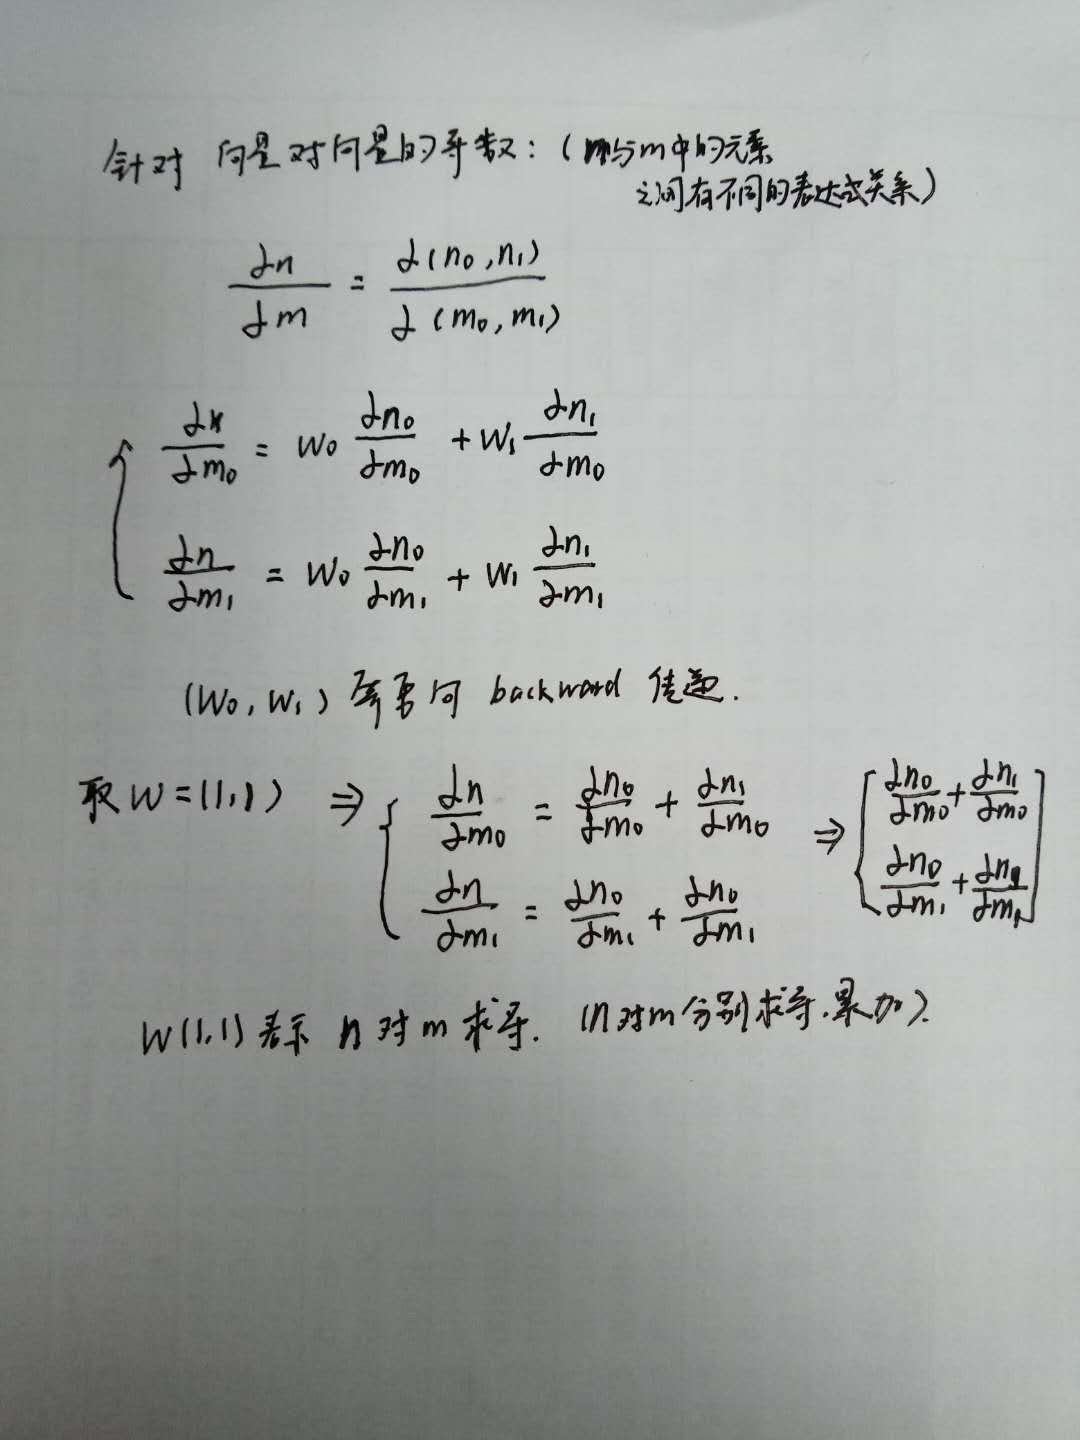

In [77]:
#向量对向量的求导
from IPython.display import Image
Image(filename="formula1.jpg")


In [74]:
m = Variable(torch.FloatTensor([[2, 3]]), requires_grad=True) # 构建一个 1 x 2 的矩阵
n = Variable(torch.zeros(1, 2)) # 构建一个相同大小的 0 矩阵
print(m)
print(n)
n[0, 0] = m[0, 0] ** 2
n[0, 1] = m[0, 1] ** 3
print(n)
n.backward(torch.ones_like(n))# 将 (w0, w1) 取成 (1, 1) 偏导前的系数
print(m.grad)

Variable containing:
 2  3
[torch.FloatTensor of size 1x2]

Variable containing:
 0  0
[torch.FloatTensor of size 1x2]

Variable containing:
  4  27
[torch.FloatTensor of size 1x2]

Variable containing:
  4  27
[torch.FloatTensor of size 1x2]



<font size=4>实现多次求导 retain_graph=True </font><br/>
通过调用 backward 我们可以进行一次自动求导，如果我们再调用一次 backward，会发现程序报错，没有办法再做一次。这是因为 PyTorch 默认做完一次自动求导之后，计算图就被丢弃了，所以两次自动求导需要手动设置一个东西，我们通过下面的小例子来说明。

In [76]:
x = Variable(torch.FloatTensor([3]), requires_grad=True)
y = x * 2 + x ** 2 + 3
print(y)
#第一次求导　保存图模型
y.backward(retain_graph=True)
print(x.grad)
#因为保存有图模型　可以进行第二次求导　　这次默认不存图模型
y.backward()
print(x.grad)#以发现 x 的梯度变成了 16，因为这里做了两次自动求导，所以讲第一次的梯度 8 和第二次的梯度 8 加起来得到了 16 的结果

Variable containing:
 18
[torch.FloatTensor of size 1]

Variable containing:
 8
[torch.FloatTensor of size 1]

Variable containing:
 16
[torch.FloatTensor of size 1]



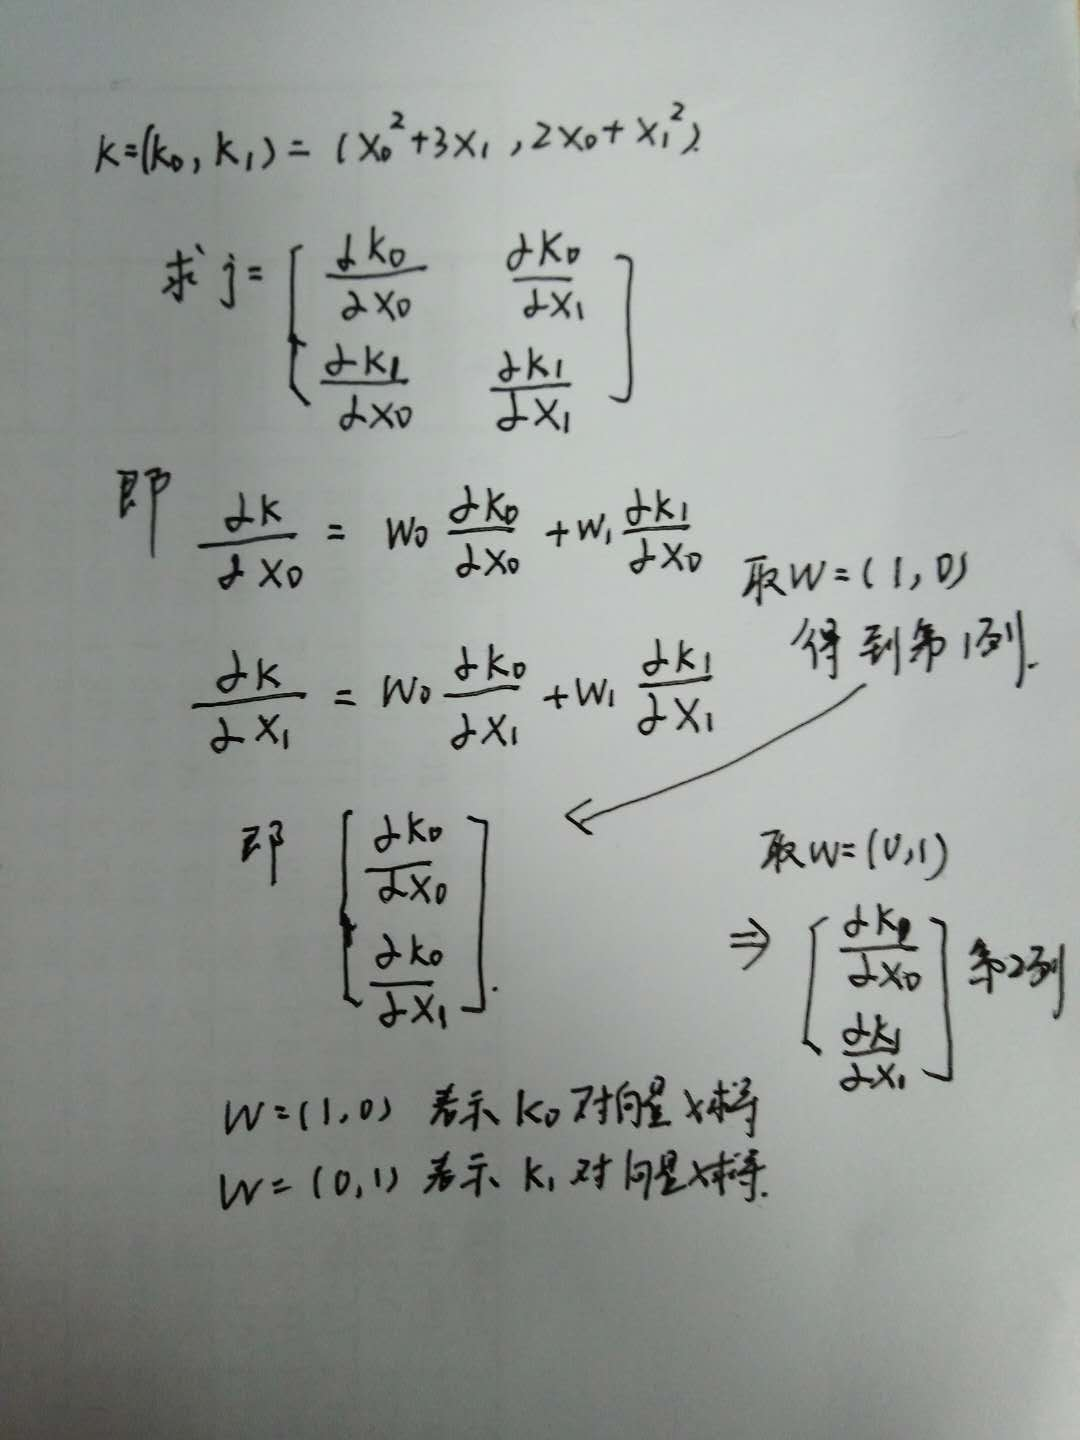

In [78]:
#向量对向量的求导
from IPython.display import Image
Image(filename="formula2.jpg")

In [92]:
x = Variable(torch.FloatTensor([[2, 3]]), requires_grad=True)
k = Variable(torch.zeros(1, 2))

k[0, 0] = x[0, 0] ** 2 + 3 * x[0 ,1]
k[0, 1] = x[0, 1] ** 2 + 2 * x[0, 0]
print(k)
j = torch.zeros(2, 2)

k.backward(torch.FloatTensor([[1, 0]]), retain_graph=True)
j[:, 0] = x.grad.data

#m.grad.data.zero_() # 归零之前求得的梯度

k.backward(torch.FloatTensor([[0, 1]]),retain_graph=True)
j[:, 1] = x.grad.data

print(j)

Variable containing:
 13  13
[torch.FloatTensor of size 1x2]


 4  6
 3  9
[torch.FloatTensor of size 2x2]



<font size=4>总结:　使用向量对向量的求导</font><br/>
针对backward()中参数的设置获得求导得到的矩阵　一次设置可以获得一个标量对一个向量的求导　对应设置为矩阵的某一列

<font size=4>对动态与静态的框架的理解</font><br/>

目前神经网络框架分为静态图框架和动态图框架，PyTorch 和 TensorFlow、Caffe 等框架最大的区别就是他们拥有不同的计算图表现形式。 TensorFlow 使用静态图，这意味着我们先定义计算图，然后不断使用它，而在 PyTorch 中，每次都会重新构建一个新的计算图。通过这次课程，我们会了解静态图和动态图之间的优缺点。

对于使用者来说，两种形式的计算图有着非常大的区别，同时静态图和动态图都有他们各自的优点，比如动态图比较方便debug，使用者能够用任何他们喜欢的方式进行debug，同时非常直观，而静态图是通过先定义后运行的方式，之后再次运行的时候就不再需要重新构建计算图，所以速度会比动态图更快。